In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# The code was removed by Watson Studio for sharing.

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [5]:
df=df_data_1
df.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [3]:
df.shape

(614, 6)

## Explore the data sets 

In [6]:
loan_data=df.copy()
loan_data.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [9]:
#checking for null records
loan_data.isnull().sum()

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [11]:
loan_data.duplicated().sum()

0

In [16]:
loan_data['ch'].mode()[0]

1.0

In [7]:
#replacing the null value in loanamt with mean of loanamt
loan_data['loanamt'].fillna(loan_data['loanamt'].mean(),inplace=True)

In [8]:
#replcaeing the null value in ch column with most repeated value
loan_data['ch'].fillna(loan_data['ch'].mode()[0],inplace=True)

In [9]:
loan_data.isnull().sum()

gender     13
married     3
ch          0
income      0
loanamt     0
status      0
dtype: int64

In [10]:
#dripping rest of the null records
loan_data.dropna(axis=0,inplace=True)

In [11]:
loan_data.isnull().sum()

gender     0
married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

In [12]:
loan_data.drop(['gender'],axis=1,inplace=True)

In [13]:
loan_data.head()

,married,ch,income,loanamt,status
0,No,1.0,5849,146.412162,Y
1,Yes,1.0,4583,128.000000,N
2,Yes,1.0,3000,66.000000,Y
3,Yes,1.0,2583,120.000000,Y
4,No,1.0,6000,141.000000,Y


In [36]:
loan_data.dtypes

married     object
ch         float64
income       int64
loanamt    float64
status      object
dtype: object

In [14]:
#converting column 'married' and 'status' from data type object to category 
columns=['married','status','ch']
for c in columns:
    loan_data[c]=loan_data[c].astype('category')
print('Success!!')

Success!!


In [15]:
loan_data.dtypes

married    category
ch         category
income        int64
loanamt     float64
status     category
dtype: object

In [16]:
# create dummy variable for category column
loan_data=pd.get_dummies(loan_data,drop_first=True)
loan_data.head()

,income,loanamt,married_Yes,ch_1.0,status_Y
0,5849,146.412162,0,1,1
1,4583,128.000000,1,1,0
2,3000,66.000000,1,1,1
3,2583,120.000000,1,1,1
4,6000,141.000000,0,1,1


In [17]:
#normlize the income and loanamt column as it contain large count
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
loan_data['income']=sc.fit_transform(loan_data[['income']])
loan_data['loanamt']=sc.fit_transform(loan_data[['loanamt']])
print('Success!')

Success!


In [18]:
loan_data.head()

,income,loanamt,married_Yes,ch_1.0,status_Y
0,0.095951,0.017158,0,1,1
1,-0.122234,-0.209680,1,1,0
2,-0.395052,-0.973518,1,1,1
3,-0.466919,-0.308239,1,1,1
4,0.121975,-0.049520,0,1,1


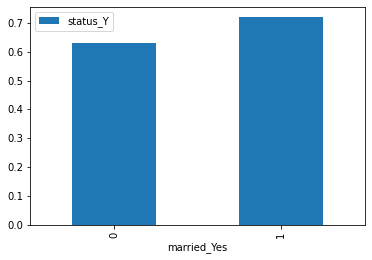

In [19]:
loan_data[['married_Yes','status_Y']].groupby('married_Yes').mean().plot(kind='bar')

In [20]:
#feature selection
X=loan_data[loan_data.columns[:-1]]
y=loan_data[loan_data.columns[-1]]

In [21]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print('Test Size:{}'.format(x_test.shape))
print('Train Size:{}'.format(x_train.shape))

Test Size:(120, 4)
Train Size:(478, 4)


In [22]:
#importing logistic regression and fitting the data
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
cnf=lr.fit(x_train,y_train)
y_pr=lr.predict(x_test)

y_pr[0:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
score = lr.score(x_test, y_test)
cnf=confusion_matrix(y_test,y_pr)
print('Accuracy Score:%.2f'%accuracy_score(y_test,y_pr))
print('Accuracy Score:%.2f'%score)

Accuracy Score:0.81
Accuracy Score:0.81


Test Size:(120, 4)


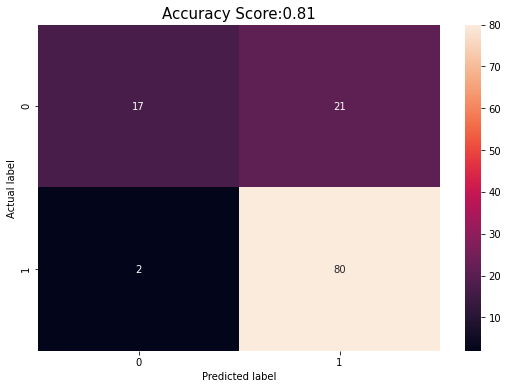

In [30]:
print('Test Size:{}'.format(x_test.shape))

plt.figure(figsize=(9,6))
sns.heatmap(cnf, annot=True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score:%.2f'%score
plt.title(all_sample_title, size = 15);

### So out of 120 we correctly predict 97 with accuracy of 0.81 (<b style='color:green'>81%</b>) which is good. 